In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_columns', 8, 'max_rows', 20)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
slb = pd.read_csv('data/slb_stock.csv', index_col='Date', parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [4]:
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [5]:
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
high_low_critirea = (slb_close < lower_10) | (slb_close > upper_10)

In [23]:
slb_top_bottom_10 = slb_close[high_low_critirea]
slb_top_bottom_10.head()

Date
2010-01-28    64.63
2010-01-29    63.46
2010-02-01    64.79
2010-02-04    62.50
2010-02-05    62.06
Name: Close, dtype: float64

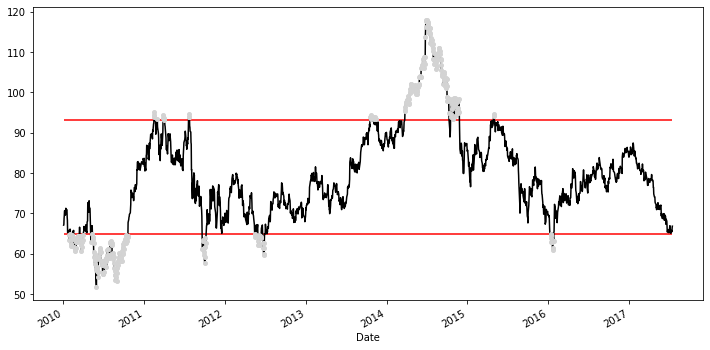

In [19]:
a1 = slb_close.plot(color='black', figsize=(12,6))
a2 = slb_top_bottom_10.plot(marker='o', style=' ', ms=4, color='lightgray')
xmin = high_low_critirea.index[0]
xmax = high_low_critirea.index[-1]
x = plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax, color='red')